In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker

In [31]:
# Load CSV data
df = pd.read_csv('2010_Chronic_Conditions.csv')
df.head()

,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,CC_ALZHDMTA,CC_CANCER,CC_CHF,CC_CHRNKIDN,CC_COPD,CC_DEPRESSN,CC_DIABETES,CC_ISCHMCHT,...,BENE_COUNT_PC_LT_12,AVE_MO_EN_PC_LT_12,BENE_COUNT_PC_EQ_12,BENE_COUNT_PD_LT_12,AVE_MO_EN_PD_LT_12,AVE_PDE_CST_PD_LT_12,AVE_PDE_PD_LT_12,BENE_COUNT_PD_EQ_12,AVE_PDE_CST_PD_EQ_12,AVE_PDE_PD_EQ_12
0,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,7230.0,49.877
1,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,42.0,5.952,2165.0,24.81,203.0,7163.0,73.404
2,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,4007.0,51.481
3,1,1,NaN,NaN,0,0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,9021.0,75.732
4,1,1,NaN,NaN,0,0,NaN,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,5925.0,61.591


In [32]:
# Total Medicare Cost is calculated as the sum of Part A, Part B and Part D
df['Total_Cost'] = (
    df['AVE_PA_PAY_PA_EQ_12'].fillna(0) +  # Part A 
    df['AVE_CA_PAY_PB_EQ_12'].fillna(0) +  # Part B 
    df['AVE_OP_PAY_PB_EQ_12'].fillna(0) +  # Part B 
    df['AVE_PDE_CST_PD_EQ_12'].fillna(0)   # Part D 
)

In [33]:
# Chronic condition columns
condition_cols = [col for col in df.columns if col.startswith('CC_')]

# Demographic columns
demographic_cols = ['BENE_SEX_IDENT_CD', 'BENE_AGE_CAT_CD']

# Utilization metrics 
utilization_cols = [
    'AVE_IP_ADM_PA_EQ_12',     # Inpatient admits
    'AVE_SNF_DAYS_PA_EQ_12',   # Skilled nursing facility days
    'AVE_CA_VST_PB_EQ_12',     # Physician visits
    'AVE_OP_VST_PB_EQ_12',     # Outpatient visits
    'AVE_PDE_PD_EQ_12'         # Prescription fills
]

In [34]:
udf = df[utilization_cols].fillna(0)

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(udf), columns=udf.columns)
df_scaled['Total Utilization'] = (df_scaled['AVE_IP_ADM_PA_EQ_12'] +
                          df_scaled['AVE_SNF_DAYS_PA_EQ_12'] +
                          df_scaled['AVE_CA_VST_PB_EQ_12'] +
                          df_scaled['AVE_OP_VST_PB_EQ_12'] +
                          df_scaled['AVE_PDE_PD_EQ_12']
                          )

df_scaled.rename(columns={
    'AVE_IP_ADM_PA_EQ_12': 'Inpatient_Admissions',
    'AVE_SNF_DAYS_PA_EQ_12': 'SNF_Days',
    'AVE_CA_VST_PB_EQ_12': 'Clinic_Visits',
    'AVE_OP_VST_PB_EQ_12': 'Outpatient_Visits',
    'AVE_PDE_PD_EQ_12': 'Prescription_Days'
}, inplace=True)


In [35]:
df_scaled[demographic_cols] = df[demographic_cols]

In [36]:
df_scaled

,Inpatient_Admissions,SNF_Days,Clinic_Visits,Outpatient_Visits,Prescription_Days,Total Utilization,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD
0,0.159450,0.102909,0.356004,0.260553,0.285543,1.164459,1,1
1,0.138306,0.142654,0.314862,0.392316,0.420234,1.408372,1,1
2,0.140768,0.047205,0.445315,0.280507,0.294726,1.208520,1,1
3,0.189718,0.154639,0.389004,0.381911,0.433562,1.548834,1,1
4,0.195945,0.000000,0.482277,0.329667,0.352605,1.360495,1,1
...,...,...,...,...,...,...,...,...
21998,0.434468,0.737148,0.141504,0.342933,0.621592,2.277644,2,6
21999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,6
22000,0.362056,0.000000,0.245395,0.479674,0.793198,1.880324,2,6
22001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,6


In [37]:
sex_map = {1: 'Male', 2: 'Female'}
agegrp_map = {
    1: 'Under 65', 2: '65-69', 3: '70-74', 4: '75-79',
    5: '80-84', 6: '85+'
}

df_scaled['BENE_SEX_IDENT_CD'] = df_scaled['BENE_SEX_IDENT_CD'].map(sex_map)
df_scaled['BENE_AGE_CAT_CD'] = df_scaled['BENE_AGE_CAT_CD'].map(agegrp_map)

In [38]:
df_scaled['Total Cost'] = df['Total_Cost']

In [39]:
df_scaled

,Inpatient_Admissions,SNF_Days,Clinic_Visits,Outpatient_Visits,Prescription_Days,Total Utilization,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,Total Cost
0,0.159450,0.102909,0.356004,0.260553,0.285543,1.164459,Male,Under 65,31790.0
1,0.138306,0.142654,0.314862,0.392316,0.420234,1.408372,Male,Under 65,30962.0
2,0.140768,0.047205,0.445315,0.280507,0.294726,1.208520,Male,Under 65,25919.0
3,0.189718,0.154639,0.389004,0.381911,0.433562,1.548834,Male,Under 65,36941.0
4,0.195945,0.000000,0.482277,0.329667,0.352605,1.360495,Male,Under 65,30658.0
...,...,...,...,...,...,...,...,...,...
21998,0.434468,0.737148,0.141504,0.342933,0.621592,2.277644,Female,85+,83211.0
21999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Female,85+,0.0
22000,0.362056,0.000000,0.245395,0.479674,0.793198,1.880324,Female,85+,67558.0
22001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Female,85+,0.0


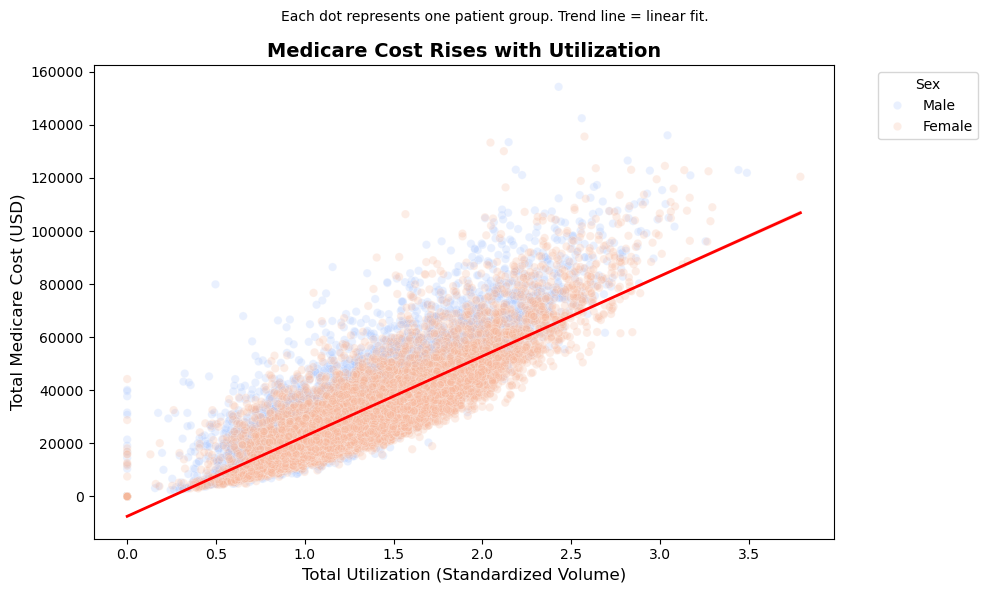

In [40]:
plt.figure(figsize=(10, 6))

# Scatterplot with color by age group and better transparency
sns.scatterplot(
    data=df_scaled,
    x='Total Utilization',
    y='Total Cost',
    hue='BENE_SEX_IDENT_CD',
    alpha=0.25,
    palette='coolwarm',
    legend='brief'
)

# Regression line with confidence interval
sns.regplot(
    data=df_scaled,
    x='Total Utilization',
    y='Total Cost',
    scatter=False,
    color='red',
    ci=95,
    line_kws={'linewidth': 2}
)

# Titles and labels
plt.title("Medicare Cost Rises with Utilization", fontsize=14, weight='bold')
plt.suptitle("Each dot represents one patient group. Trend line = linear fit.", fontsize=10)
plt.xlabel("Total Utilization (Standardized Volume)", fontsize=12)
plt.ylabel("Total Medicare Cost (USD)", fontsize=12)

plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()